In [1]:
pip install tweepy

In [2]:
pip install textblob

In [3]:
pip install pycountry

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 17.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681833 sha256=4e36a3e42ef717aae860f9c00c19aa1dec3f62e32111e72ae762142dbb27632c
  Stored in directory: /root/.cache/pip/wheels/03/57/cc/290c5252ec97a6d78d36479a3c5e5ecc76318afcb241ad9dbe
Successfully built pycountry


In [4]:
pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=b50cdcfe395afa92c491c4a8243c1451bea394a325c8f04c39bcd6acbd252816
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [5]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [7]:
import tweepy
import re
import time

In [8]:
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
uploaded = files.upload()

Saving OpenDataTwitter_hot_posts2.txt to OpenDataTwitter_hot_posts2.txt


In [11]:
# Reading the dataset
data = pd.read_csv('OpenDataTwitter_hot_posts2.txt', encoding='utf-8') # Read the dataset

<ipython-input-11-4e3b8f75b8d0>:2: DtypeWarning: Columns (5,6,8,19,23,30,37,46,65) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('OpenDataTwitter_hot_posts2.txt', encoding='utf-8') # Read the dataset


In [15]:
df = data.copy()
#df.drop('Unnamed: 0', axis=1,inplace=True)

In [16]:
df

,id_str,from_user,text,created_at,time,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,...,user_profile_sidebar_fill_color,user_profile_text_color,user_profile_use_background_image,user_protected,user_screen_name,user_statuses_count,user_time_zone,user_url,user_utc_offset,user_verified
0,1.338985e+18,cuestion_p,¡En @cuestion_p le apostamos a los datos abier...,Tue Dec 15 23:10:00 +0000 2020,15/12/2020 23:10:00,NaN,NaN,NaN,NaN,9.156155e+17,...,0,0,NaN,NaN,cuestion_p,17205.0,NaN,https://cuestionpublica.com/abonate-al-club-cp/,NaN,NaN
1,1.338968e+18,PieterOmtzigt,Hier de cijfers van vorig jaar. \nVoor Corona\...,Tue Dec 15 22:02:46 +0000 2020,15/12/2020 22:02:46,NaN,NaN,1.922396e+07,PieterOmtzigt,1.922396e+07,...,DAECF4,663B12,True,NaN,PieterOmtzigt,37161.0,NaN,http://www.pieteromtzigt.nl,NaN,True
2,1.338967e+18,merrdiff,Astronomer denizens of twitter! Have you done ...,Tue Dec 15 21:57:50 +0000 2020,15/12/2020 21:57:50,NaN,NaN,NaN,NaN,1.155161e+08,...,C0DFEC,333333,True,NaN,merrdiff,15384.0,NaN,http://staff.washington.edu/mrawls,NaN,NaN
3,1.338966e+18,mikewulder,"Excellent post. 🏆\n""It's not the sale of data ...",Tue Dec 15 21:56:20 +0000 2020,15/12/2020 21:56:20,NaN,NaN,NaN,NaN,4.004090e+08,...,DDEEF6,333333,True,NaN,mikewulder,3584.0,NaN,https://www.researchgate.net/profile/Michael_W...,NaN,NaN
4,1.338961e+18,demo_demo_nl,@thierrybaudet Heb nog even uitgerekend wat de...,Tue Dec 15 21:37:50 +0000 2020,15/12/2020 21:37:50,NaN,NaN,8.413641e+17,demo_demo_nl,8.413641e+17,...,DDEEF6,333333,True,NaN,demo_demo_nl,13839.0,NaN,http://www.demo-demo.nl/,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24617,9.786153e+17,dataenvagency,NOTICE: From the 1st April all commercial re-u...,Tue Mar 27 12:50:36 +0000 2018,27/03/2018 13:50:36,NaN,en,NaN,NaN,5.225594e+08,...,DDEEF6,333333,NaN,NaN,dataenvagency,1975.0,Pacific Time (US & Canada),https://www.gov.uk/environment-agency,-25200.0,NaN
24618,9.785740e+17,Wellcome_AMR,Kicking off exciting day of discussions with @...,Tue Mar 27 10:06:30 +0000 2018,27/03/2018 11:06:30,NaN,en-gb,NaN,NaN,3.292777e+09,...,0,0,NaN,NaN,Wellcome_AMR,1562.0,London,http://wellcome.ac.uk/DRI,3600.0,NaN
24619,9.785564e+17,ExpressionAtlas,Talented #Biocurator? Interested in Data stand...,Tue Mar 27 08:56:49 +0000 2018,27/03/2018 09:56:49,NaN,en,NaN,NaN,7.234937e+17,...,0,0,True,NaN,ExpressionAtlas,302.0,NaN,http://www.ebi.ac.uk/gxa,NaN,NaN
24620,9.785452e+17,SemanticsConf,#5Days before #Deadline expires: Submit #Works...,Tue Mar 27 08:12:12 +0000 2018,27/03/2018 09:12:12,NaN,en,NaN,NaN,2.315608e+09,...,252429,666666,NaN,NaN,SemanticsConf,736.0,Bern,http://www.semantics.cc,7200.0,NaN


In [14]:
#df = df.loc[df['lang'] == 'en']

In [17]:
df

,id_str,from_user,text,created_at,time,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,...,user_profile_sidebar_fill_color,user_profile_text_color,user_profile_use_background_image,user_protected,user_screen_name,user_statuses_count,user_time_zone,user_url,user_utc_offset,user_verified
0,1.338985e+18,cuestion_p,¡En @cuestion_p le apostamos a los datos abier...,Tue Dec 15 23:10:00 +0000 2020,15/12/2020 23:10:00,NaN,NaN,NaN,NaN,9.156155e+17,...,0,0,NaN,NaN,cuestion_p,17205.0,NaN,https://cuestionpublica.com/abonate-al-club-cp/,NaN,NaN
1,1.338968e+18,PieterOmtzigt,Hier de cijfers van vorig jaar. \nVoor Corona\...,Tue Dec 15 22:02:46 +0000 2020,15/12/2020 22:02:46,NaN,NaN,1.922396e+07,PieterOmtzigt,1.922396e+07,...,DAECF4,663B12,True,NaN,PieterOmtzigt,37161.0,NaN,http://www.pieteromtzigt.nl,NaN,True
2,1.338967e+18,merrdiff,Astronomer denizens of twitter! Have you done ...,Tue Dec 15 21:57:50 +0000 2020,15/12/2020 21:57:50,NaN,NaN,NaN,NaN,1.155161e+08,...,C0DFEC,333333,True,NaN,merrdiff,15384.0,NaN,http://staff.washington.edu/mrawls,NaN,NaN
3,1.338966e+18,mikewulder,"Excellent post. 🏆\n""It's not the sale of data ...",Tue Dec 15 21:56:20 +0000 2020,15/12/2020 21:56:20,NaN,NaN,NaN,NaN,4.004090e+08,...,DDEEF6,333333,True,NaN,mikewulder,3584.0,NaN,https://www.researchgate.net/profile/Michael_W...,NaN,NaN
4,1.338961e+18,demo_demo_nl,@thierrybaudet Heb nog even uitgerekend wat de...,Tue Dec 15 21:37:50 +0000 2020,15/12/2020 21:37:50,NaN,NaN,8.413641e+17,demo_demo_nl,8.413641e+17,...,DDEEF6,333333,True,NaN,demo_demo_nl,13839.0,NaN,http://www.demo-demo.nl/,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24617,9.786153e+17,dataenvagency,NOTICE: From the 1st April all commercial re-u...,Tue Mar 27 12:50:36 +0000 2018,27/03/2018 13:50:36,NaN,en,NaN,NaN,5.225594e+08,...,DDEEF6,333333,NaN,NaN,dataenvagency,1975.0,Pacific Time (US & Canada),https://www.gov.uk/environment-agency,-25200.0,NaN
24618,9.785740e+17,Wellcome_AMR,Kicking off exciting day of discussions with @...,Tue Mar 27 10:06:30 +0000 2018,27/03/2018 11:06:30,NaN,en-gb,NaN,NaN,3.292777e+09,...,0,0,NaN,NaN,Wellcome_AMR,1562.0,London,http://wellcome.ac.uk/DRI,3600.0,NaN
24619,9.785564e+17,ExpressionAtlas,Talented #Biocurator? Interested in Data stand...,Tue Mar 27 08:56:49 +0000 2018,27/03/2018 09:56:49,NaN,en,NaN,NaN,7.234937e+17,...,0,0,True,NaN,ExpressionAtlas,302.0,NaN,http://www.ebi.ac.uk/gxa,NaN,NaN
24620,9.785452e+17,SemanticsConf,#5Days before #Deadline expires: Submit #Works...,Tue Mar 27 08:12:12 +0000 2018,27/03/2018 09:12:12,NaN,en,NaN,NaN,2.315608e+09,...,252429,666666,NaN,NaN,SemanticsConf,736.0,Bern,http://www.semantics.cc,7200.0,NaN


In [18]:
tweet_list = df['text']

In [19]:
tweet_list

0        ¡En @cuestion_p le apostamos a los datos abier...
1        Hier de cijfers van vorig jaar. \nVoor Corona\...
2        Astronomer denizens of twitter! Have you done ...
3        Excellent post. 🏆\n"It's not the sale of data ...
4        @thierrybaudet Heb nog even uitgerekend wat de...
                               ...                        
24617    NOTICE: From the 1st April all commercial re-u...
24618    Kicking off exciting day of discussions with @...
24619    Talented #Biocurator? Interested in Data stand...
24620    #5Days before #Deadline expires: Submit #Works...
24621    We want to make it easier for people outside a...
Name: text, Length: 24622, dtype: object

Cleaning Tweets and using cleaned tweets for calculating sentiment

In [20]:
# Dropping duplicated tweets
tweet_list.drop_duplicates(inplace = True)

In [21]:
tweet_list # After removing duplicated tweets there are 2558 tweets (464 - 318 = 146 duplicated tweets are removed)

0        ¡En @cuestion_p le apostamos a los datos abier...
1        Hier de cijfers van vorig jaar. \nVoor Corona\...
2        Astronomer denizens of twitter! Have you done ...
3        Excellent post. 🏆\n"It's not the sale of data ...
4        @thierrybaudet Heb nog even uitgerekend wat de...
                               ...                        
24617    NOTICE: From the 1st April all commercial re-u...
24618    Kicking off exciting day of discussions with @...
24619    Talented #Biocurator? Interested in Data stand...
24620    #5Days before #Deadline expires: Submit #Works...
24621    We want to make it easier for people outside a...
Name: text, Length: 22264, dtype: object

In [22]:
# 2. Create new data frame (tw_list) and a new feature(text) containing tweets, then cleaning the text
#Cleaning Text: clean text by using lambda function and clean RT, link, punctuation, characters and finally convert to lowercase.
tw_list = pd.DataFrame(tweet_list)

In [23]:
tw_list

,text
0,¡En @cuestion_p le apostamos a los datos abier...
1,Hier de cijfers van vorig jaar. \nVoor Corona\...
2,Astronomer denizens of twitter! Have you done ...
3,"Excellent post. 🏆\n""It's not the sale of data ..."
4,@thierrybaudet Heb nog even uitgerekend wat de...
...,...
24617,NOTICE: From the 1st April all commercial re-u...
24618,Kicking off exciting day of discussions with @...
24619,Talented #Biocurator? Interested in Data stand...
24620,#5Days before #Deadline expires: Submit #Works...


In [24]:
# Creating a function for cleaning the tweets. It will clean RT, link, punctuation, characters and finally convert to lowercase.
def clean_tweet(tweet):
    return ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|([RT])', ' ', str(tweet).lower()).split())

In [25]:
# Call function to get Clean tweets
tw_list['cleanedtext'] = tw_list['text'].apply(lambda x : clean_tweet(x))
tw_list.cleanedtext.head(10)

0    en p le apostamos a los datos abiertos por eso...
1    hier de cijfers van vorig jaar voor corona iet...
2    astronomer denizens of twitter have you done a...
3    excellent post it s not the sale of data that ...
4    heb nog even uitgerekend wat de sterfte totaal...
5    er is wel oversterfte lijkt om ruim 12 000 per...
6    our new manuscript published at first open dat...
7    movement of iceberg a 68a near southgeorgiaisl...
8    meanwhile in mexico president amlo continues h...
9    sneak peek the team is collecting canada vacci...
Name: cleanedtext, dtype: object

In [26]:
tw_list.columns

Index(['text', 'cleanedtext'], dtype='object')

In [27]:
new_df=tw_list['cleanedtext']

In [28]:
new_df = pd.DataFrame(new_df)

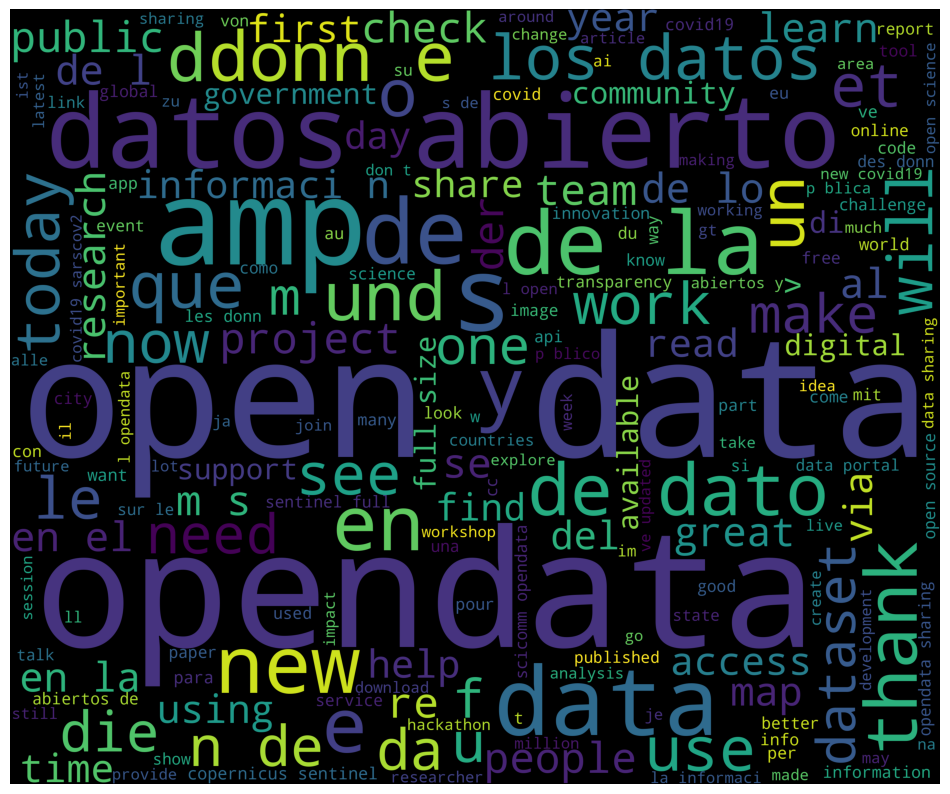

In [29]:
# Wordcloud for tweets with all sentiments
from wordcloud import WordCloud,STOPWORDS

new_df=tw_list['cleanedtext']
new_df = pd.DataFrame(new_df)
words = ' '.join(new_df['cleanedtext'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [30]:
wordcloud.to_file("wc_without_sentiment_analysis_Open_Data.png") # Word cloud has tweets with positive, negative and neutral sentiments. So, one word cloud for all sentiments.

Analysis using original dataframe

In [31]:
# Removing duplicates based on text
df.drop_duplicates(subset='text', inplace=True)

In [32]:
df

,id_str,from_user,text,created_at,time,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,...,user_profile_sidebar_fill_color,user_profile_text_color,user_profile_use_background_image,user_protected,user_screen_name,user_statuses_count,user_time_zone,user_url,user_utc_offset,user_verified
0,1.338985e+18,cuestion_p,¡En @cuestion_p le apostamos a los datos abier...,Tue Dec 15 23:10:00 +0000 2020,15/12/2020 23:10:00,NaN,NaN,NaN,NaN,9.156155e+17,...,0,0,NaN,NaN,cuestion_p,17205.0,NaN,https://cuestionpublica.com/abonate-al-club-cp/,NaN,NaN
1,1.338968e+18,PieterOmtzigt,Hier de cijfers van vorig jaar. \nVoor Corona\...,Tue Dec 15 22:02:46 +0000 2020,15/12/2020 22:02:46,NaN,NaN,1.922396e+07,PieterOmtzigt,1.922396e+07,...,DAECF4,663B12,True,NaN,PieterOmtzigt,37161.0,NaN,http://www.pieteromtzigt.nl,NaN,True
2,1.338967e+18,merrdiff,Astronomer denizens of twitter! Have you done ...,Tue Dec 15 21:57:50 +0000 2020,15/12/2020 21:57:50,NaN,NaN,NaN,NaN,1.155161e+08,...,C0DFEC,333333,True,NaN,merrdiff,15384.0,NaN,http://staff.washington.edu/mrawls,NaN,NaN
3,1.338966e+18,mikewulder,"Excellent post. 🏆\n""It's not the sale of data ...",Tue Dec 15 21:56:20 +0000 2020,15/12/2020 21:56:20,NaN,NaN,NaN,NaN,4.004090e+08,...,DDEEF6,333333,True,NaN,mikewulder,3584.0,NaN,https://www.researchgate.net/profile/Michael_W...,NaN,NaN
4,1.338961e+18,demo_demo_nl,@thierrybaudet Heb nog even uitgerekend wat de...,Tue Dec 15 21:37:50 +0000 2020,15/12/2020 21:37:50,NaN,NaN,8.413641e+17,demo_demo_nl,8.413641e+17,...,DDEEF6,333333,True,NaN,demo_demo_nl,13839.0,NaN,http://www.demo-demo.nl/,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24617,9.786153e+17,dataenvagency,NOTICE: From the 1st April all commercial re-u...,Tue Mar 27 12:50:36 +0000 2018,27/03/2018 13:50:36,NaN,en,NaN,NaN,5.225594e+08,...,DDEEF6,333333,NaN,NaN,dataenvagency,1975.0,Pacific Time (US & Canada),https://www.gov.uk/environment-agency,-25200.0,NaN
24618,9.785740e+17,Wellcome_AMR,Kicking off exciting day of discussions with @...,Tue Mar 27 10:06:30 +0000 2018,27/03/2018 11:06:30,NaN,en-gb,NaN,NaN,3.292777e+09,...,0,0,NaN,NaN,Wellcome_AMR,1562.0,London,http://wellcome.ac.uk/DRI,3600.0,NaN
24619,9.785564e+17,ExpressionAtlas,Talented #Biocurator? Interested in Data stand...,Tue Mar 27 08:56:49 +0000 2018,27/03/2018 09:56:49,NaN,en,NaN,NaN,7.234937e+17,...,0,0,True,NaN,ExpressionAtlas,302.0,NaN,http://www.ebi.ac.uk/gxa,NaN,NaN
24620,9.785452e+17,SemanticsConf,#5Days before #Deadline expires: Submit #Works...,Tue Mar 27 08:12:12 +0000 2018,27/03/2018 09:12:12,NaN,en,NaN,NaN,2.315608e+09,...,252429,666666,NaN,NaN,SemanticsConf,736.0,Bern,http://www.semantics.cc,7200.0,NaN


In [33]:
df.columns

Index(['id_str', 'from_user', 'text', 'created_at', 'time', 'geo_coordinates',
       'user_lang', 'in_reply_to_user_id_str', 'in_reply_to_screen_name',
       'from_user_id_str', 'in_reply_to_status_id_str', 'source',
       'profile_image_url', 'user_followers_count', 'user_friends_count',
       'user_location', 'status_url', 'entities_str', 'contributors',
       'coordinates', 'entities', 'favorite_count', 'favorited', 'geo', 'id',
       'in_reply_to_status_id', 'in_reply_to_user_id', 'lang', 'metadata',
       'place', 'possibly_sensitive', 'retweet_count', 'retweeted',
       'truncated', 'user_contributors_enabled', 'user_created_at',
       'user_default_profile', 'user_default_profile_image',
       'user_description', 'user_favourites_count', 'user_follow_request_sent',
       'user_following', 'user_geo_enabled', 'user_id', 'user_id_str',
       'user_is_translation_enabled', 'user_is_translator',
       'user_listed_count', 'user_name', 'user_notifications',
       'user_

Extracting data from user column

In [34]:
"""
df['usr_name'] = df['user'].apply(lambda x: x.get('name'))
df['foll_count'] = df['user'].apply(lambda x: x.get('followers_count'))
df['friends_count'] = df['user'].apply(lambda x: x.get('friends_count'))
df['fav_count'] = df['user'].apply(lambda x: x.get('favourites_count'))
df['status_count'] = df['user'].apply(lambda x: x.get('statuses_count'))
#The number of public lists that this user is a member of.
df['listed_count'] = df['user'].apply(lambda x: x.get('listed_count'))
# screen name of each user
df['screen_name'] = df['user'].apply(lambda x: x.get('screen_name'))
"""

KeyError: ignored

In [35]:
df.columns

Index(['id_str', 'from_user', 'text', 'created_at', 'time', 'geo_coordinates',
       'user_lang', 'in_reply_to_user_id_str', 'in_reply_to_screen_name',
       'from_user_id_str', 'in_reply_to_status_id_str', 'source',
       'profile_image_url', 'user_followers_count', 'user_friends_count',
       'user_location', 'status_url', 'entities_str', 'contributors',
       'coordinates', 'entities', 'favorite_count', 'favorited', 'geo', 'id',
       'in_reply_to_status_id', 'in_reply_to_user_id', 'lang', 'metadata',
       'place', 'possibly_sensitive', 'retweet_count', 'retweeted',
       'truncated', 'user_contributors_enabled', 'user_created_at',
       'user_default_profile', 'user_default_profile_image',
       'user_description', 'user_favourites_count', 'user_follow_request_sent',
       'user_following', 'user_geo_enabled', 'user_id', 'user_id_str',
       'user_is_translation_enabled', 'user_is_translator',
       'user_listed_count', 'user_name', 'user_notifications',
       'user_

In [36]:
df.to_csv("TwitterDataPrepWithoutSentiAnalysisOpenData.csv")